In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_digits

mnsit = load_digits()
X = mnsit.data
y = mnsit.target

In [3]:
len(X), len(X[0])

(1797, 64)

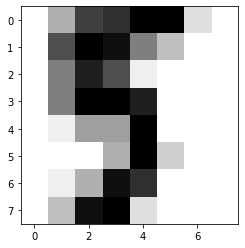

In [4]:
plt.imshow(X[15].reshape(8,8), cmap = 'binary')
plt.show()

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [6]:
len(X_train), len(X_test)

(1437, 360)

In [7]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
def knn_classification_model(data, X, y, k):
  temp = data - X
  temp = temp**2
  temp = np.sum(temp, axis=1)**(1/2)
  idx = np.argpartition(temp, k)
  k_min_idx = y[idx[1:k+1]]
  k_min_idx = pd.Series(k_min_idx)
  res = k_min_idx.value_counts().index[0]
  
  return res

In [9]:
def find_cost(y_pred, Y):
  t = np.sum((y_pred - Y)**2)/len(Y)
  return t

In [10]:
cost = np.zeros(10)

for k in range(1, 10):
  y_pred = []
  for i in range(len(X_train)):
    y_pred.append(knn_classification_model(X_train[i], X_train, y_train, k))
  cost[k] = find_cost(y_pred, y_train)

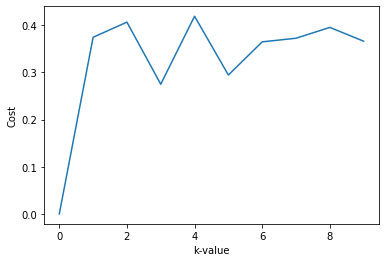

In [11]:
sns.lineplot(np.arange(10), cost)
plt.xlabel('k-value')
plt.ylabel('Cost')
plt.show()

In [12]:
k = 5 # optimum

y_pred = []

for i in range(len(X_test)):
  y_pred.append(knn_classification_model(X_test[i], X_train, y_train, k))

In [13]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_pred, y_test)
accuracy

0.9722222222222222

#### Using sklearn

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred2 = knn.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score
accuracy2 = accuracy_score(y_pred2, y_test)
accuracy2

0.9805555555555555